# 4. 이진 분류 - Logistic Regression (로지스틱 회귀)
* 로지스틱 회귀(Logistic Regression) : 이름은 회귀이지만 분류 모델임
* 선형 회귀와 동일하게 선형 방정식을 학습함
* z = a * Weight + b * Length + c * Height ..
* z를 그대로 쓰면 회귀모델
* 확률도 만듦 (0~100% -> 0과 1사이의 값)
* z가 아주 큰 음수일 때는 0이 되고, 아주 큰 양수일 때는 1이 되도록 바꾸는 함수 -> 시그모이드 (또는 로지스틱 함수)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 4-1. 시그모이드 함수
* 시그모이드 함수 출력이 0.5보다 크면 양성클래스
* 0.5보다 작으면 음성클래스로 판단
* 정확히 0.5이면 사이킷런의 경우 음성클래스로 판단

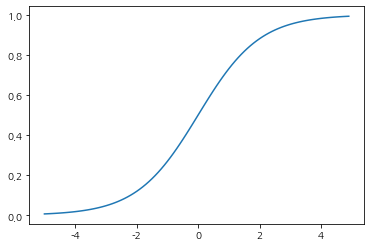

In [3]:
plt.rcParams['axes.unicode_minus'] = False

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)

plt.show()

## 4-2. 데이터 준비하기

In [28]:
ori_data = pd.read_csv('data/02_fish/fish.csv')
data = ori_data.copy()
data.head()

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [34]:
# 입력데이터 만들기
input_df = data[(data.Species=='Bream') | (data.Species=='Smelt')]
input_df = input_df[['Weight','Vertical_Length','Diagonal_Length','Cross_Length','Height','Width']]
input_df.head()

,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [1]:
# 입력데이터는 2차원 배열로 만들기
input_data = input_df.to_numpy()
input_data[:5]

NameError: name 'input_df' is not defined

In [39]:
# 타겟데이터 만들기
target_df = data[(data.Species=='Bream') | (data.Species=='Smelt')][['Species']]
target_df.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [41]:
# 타겟데이터는 1차원 배열로 만들기
target_data = target_df['Species'].to_numpy()
target_data

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

## 4-3. 데이터 나누기

In [42]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트 나누기
train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, stratify=target_data, random_state=42)
train_input.shape, test_input.shape

((36, 6), (13, 6))

In [43]:
train_target

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [44]:
test_target

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

## 4-4. 데이터 전처리 - 표준화

In [45]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [46]:
train_scaled[:5]

array([[ 0.85382543,  0.79962404,  0.79935928,  0.80567236,  0.8021994 ,
         0.94206579],
       [-0.24256812,  0.17119488,  0.20479453,  0.20860116,  0.20215901,
         0.09992817],
       [-1.33066961, -1.53769142, -1.54917151, -1.54897461, -1.57423679,
        -1.53349422],
       [ 0.17817675,  0.41374649,  0.37325454,  0.43565641,  0.44942495,
         0.35955077],
       [-1.32729137, -1.5487165 , -1.55908092, -1.56579351, -1.55688885,
        -1.53761603]])

In [47]:
test_scaled

array([[ 0.86918109,  0.77757389,  0.79935928,  0.83090072,  0.80190201,
         0.92310545],
       [ 0.54671239,  0.74449868,  0.74981222,  0.72998728,  0.66356459,
         0.52478389],
       [ 1.56018542,  1.46112842,  1.39392404,  1.30183011,  1.01065553,
         1.0865868 ],
       [-1.29627295, -1.20693923, -1.18252324, -1.24623428, -1.41661838,
        -1.22744971],
       [-1.31992065, -1.39436547, -1.38071149, -1.44806117, -1.52486952,
        -1.54864188],
       [ 0.51600109,  0.67834824,  0.6507181 ,  0.63748329,  0.68178819,
         0.44940626],
       [-1.32667714, -1.48256606, -1.49962444, -1.50692734, -1.5352948 ,
        -1.53421554],
       [ 0.40851153,  0.72244853,  0.70026516,  0.71316837,  0.59843548,
         0.67389042],
       [-1.33589053, -1.61486693, -1.61853739, -1.63306914, -1.61550836,
        -1.6039772 ],
       [ 1.25307238,  0.88782462,  0.89845341,  0.88976689,  0.8894017 ,
         0.99791633],
       [-0.15964759,  0.31452083,  0.30388865,  0.

## 4-5. 모델 학습 및 평가

In [48]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [49]:
lr.predict(train_scaled[:5])

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt'], dtype=object)

In [50]:
# 예측 확률 (첫번째 열이 음성클래스(0), 두번째 열이 양성클래스(1))
lr.predict_proba(train_scaled[:5])

array([[0.99784573, 0.00215427],
       [0.96528158, 0.03471842],
       [0.03685659, 0.96314341],
       [0.98702599, 0.01297401],
       [0.03634457, 0.96365543]])

In [51]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [54]:
lr.predict(train_scaled)

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [55]:
train_target

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [57]:
lr.score(test_scaled, test_target)

1.0

In [58]:
# 학습한 계수 확인
lr.coef_, lr.intercept_  # 가중치, 절편

(array([[-0.47541474, -0.67595197, -0.68192289, -0.71326925, -0.74678165,
         -0.69768776]]),
 array([-2.81562025]))

* 로지스틱 회귀모델이 학습한 방정식  
* Feature : Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width  
z = -0.475 * Weight - 0.675 * Vertical_Length - 0.681 * Diagonal_Length - 0.713 * Cross_Length - 0.746 * Height - 0.697 * Width - 2.815

In [61]:
# Z값 확인하기 (양성 클래스에 대한 z값 반환)
decisions = lr.decision_function(train_scaled[:5])
decisions

array([-6.13814717, -3.32514949,  3.26316801, -4.33174847,  3.27768884])

In [62]:
# 시그모이드 함수 적용 (양성 클래스에 대한 확률)
1 / (1 + np.exp(-decisions))

array([0.00215427, 0.03471842, 0.96314341, 0.01297401, 0.96365543])